In [87]:
from Utils_16S_Analysis import *

rcParams = {'font.size': 24, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [2]:
filedir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/16S_Read_Alignments/'
samples = listdir(filedir+'Alpha_Alleles/paf_files/')

fdir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/16S_Gene_Segments/'
out = {}
for f in ['Synechococcus_Alpha_16SrRNA','Synechococcus_Beta_16SrRNA','Synechococcus_Gamma_16SrRNA']:
    lines = open(fdir+f+'.fna').readlines()
    s = ''
    for l in lines:
        if not l.startswith('>'):
            s += l.replace("\n","")
    out[f.replace("Synechococcus_","").replace("_16SrRNA","")] = s

In [3]:
AP_All_Samples = {}

for s in samples:
    Alignment_profile = {'Alpha':{'A':np.zeros(1300),'C':np.zeros(1300),'G':np.zeros(1300),'T':np.zeros(1300)},
                         'Beta':{'A':np.zeros(1300),'C':np.zeros(1300),'G':np.zeros(1300),'T':np.zeros(1300)},
                         'Gamma':{'A':np.zeros(1300),'C':np.zeros(1300),'G':np.zeros(1300),'T':np.zeros(1300)}}
    
    df_alpha = Load_PAF(filedir+'Alpha_Alleles/paf_files/'+s, s)
    df_beta = Load_PAF(filedir+'Beta_Alleles/paf_files/'+s, s)
    df_gamma = Load_PAF(filedir+'Gamma_Alleles/paf_files/'+s, s)
    
    Temp = pd.DataFrame()
    Temp = Temp.append(df_alpha).append(df_beta).append(df_gamma)
    Temp = Temp[Temp['SEnd'] < 1300]
    Temp['Subject'] = Temp['Subject'].str.replace("Synechococcus_","")
    Temp['Subject'] = Temp['Subject'].str.replace("_16SrRNA","")
    
    CS_strings = Temp['CS'].tolist()
    SStarts = Temp['SStart'].tolist()
    SEnds = Temp['SEnd'].tolist()
    subjects = Temp['Subject'].tolist()
    
    for i in range(0, len(CS_strings)):
        out_string = Parse_CS_String(CS_strings[i].replace("cs:Z:",""), out[subjects[i]][SStarts[i]:SEnds[i]])
        AP = Generate_Alignment_Profile(out_string)
        for n in ['A','C','G','T']:
            Alignment_profile[subjects[i]][n][SStarts[i]:SEnds[i]] += AP[n]
    AP_All_Samples[s.replace("_FD.paf","")] = Alignment_profile
    print(s)

HotsprSampleMS50_FD.paf
HotsprottomLayer_2_FD.paf
Hotspr2Sample149_FD.paf
HotsprSampleR4cd_FD.paf
HotsprSampOS1265_FD.paf
HotsprSampleOS50_FD.paf
HotsprSampleOS60_FD.paf
HotsprOSTMatCore_FD.paf
Hotspr20SampleT9_FD.paf
HotsprSampleMSe2_FD.paf
HotsprSampleMSe3_FD.paf
HotsprSampleMS13_FD.paf
Hotspr20SampleP4_FD.paf
HotsprSampleOSM1_FD.paf
HotsprSampOS1260_FD.paf
HotsprSampleMSe1_FD.paf
HotsprSampleMS60_FD.paf
HotsprSampleMSe4_FD.paf
Hotspr2Sampleee2_FD.paf
Hotspr2SamplePe2_FD.paf
Hotspr20Samplem2_FD.paf
Hotspr2Sample148_FD.paf
HotsprSampleMS65_FD.paf
Hotspr20Samplet1_FD.paf
HotsprSampleOSM2_FD.paf
Hotspr2Sampleme2_FD.paf
HotsprSampleOSM3_FD.paf
Hotspr20SampleT8_FD.paf
HotsprottomLayer_FD.paf
HotsprSampleMS55_FD.paf
HotsprSampleOS65_FD.paf
HotsprSampleOSM4_FD.paf
HotsprSamplt10cd_FD.paf
HotsprSampleOS55_FD.paf


In [142]:
df = pd.DataFrame()
for g in Alignment_profile.keys():
    for n in ['A','C','G','T']:
        df[(g,n)] = np.zeros(1300)
        for s in AP_All_Samples:
            df[(g,n)] += AP_All_Samples[s][g][n]
df_freq_diff = pd.DataFrame()

for g in Alignment_profile.keys():
    df_freq_diff[g] = np.zeros(1300)
    for n in ['C','G','T']:
        print(g, n)
        df_freq_diff[g] += df[(g, 'A')] - df[(g,n)] 
    df_freq_diff[g] = df_freq_diff[g]/3
    
s = (df[[('Alpha','A'),('Alpha','C'),('Alpha','G'),('Alpha','T')]].sum(axis = 1))
df['Alpha','A'] = df[('Alpha','A')]/s*100
df['Alpha','C'] = df[('Alpha','C')]/s*100
df['Alpha','G'] = df[('Alpha','G')]/s*100
df['Alpha','T'] = df[('Alpha','T')]/s*100

s = (df[[('Beta','A'),('Beta','C'),('Beta','G'),('Beta','T')]].sum(axis = 1))
df['Beta','A'] = df[('Beta','A')]/s*100
df['Beta','C'] = df[('Beta','C')]/s*100
df['Beta','G'] = df[('Beta','G')]/s*100
df['Beta','T'] = df[('Beta','T')]/s*100

s = (df[[('Gamma','A'),('Gamma','C'),('Gamma','G'),('Gamma','T')]].sum(axis = 1))
df['Gamma','A'] = df[('Gamma','A')]/s*100
df['Gamma','C'] = df[('Gamma','C')]/s*100
df['Gamma','G'] = df[('Gamma','G')]/s*100
df['Gamma','T'] = df[('Gamma','T')]/s*100


Alpha C
Alpha G
Alpha T
Beta C
Beta G
Beta T
Gamma C
Gamma G
Gamma T


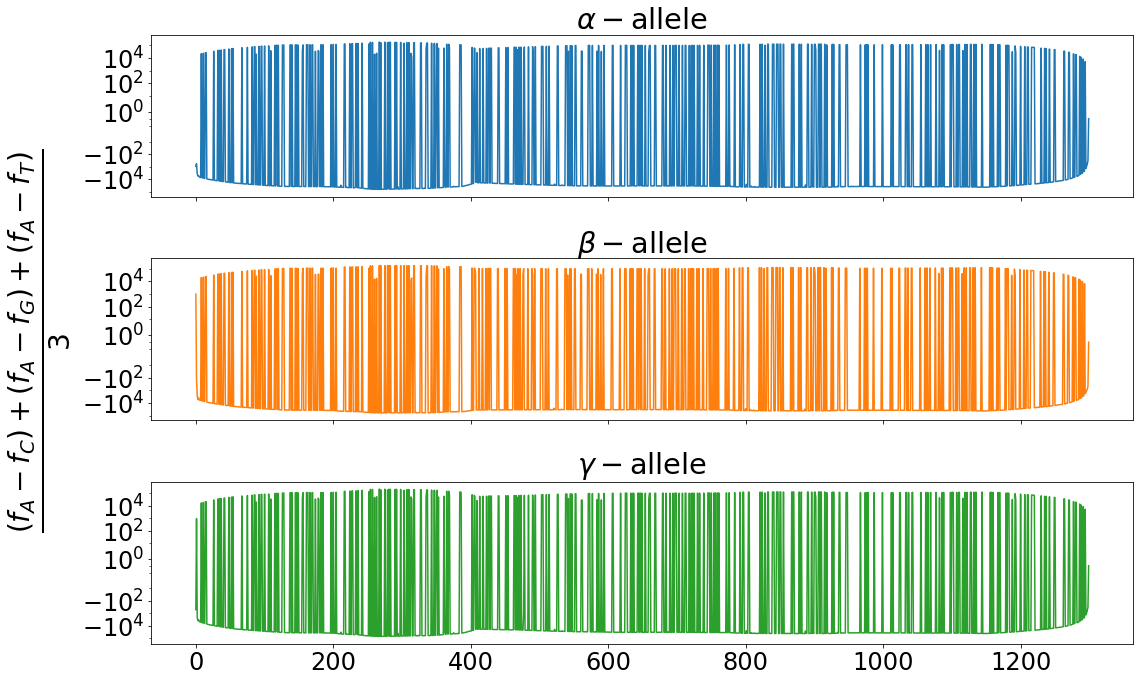

In [164]:
fig, ax = plt.subplots(3,1, figsize = (16,10), sharex = True)
ax[0].plot(df_freq_diff['Alpha'], color = 'C0')
ax[1].plot(df_freq_diff['Beta'], color = 'C1')
ax[2].plot(df_freq_diff['Gamma'], color = 'C2')

ax[0].set_yscale('symlog')
ax[0].set_yticks([-10000, -100, 1, 100, 10000])
ax[0].set_title(r'$\alpha-$allele')

ax[1].set_yscale('symlog')
ax[1].set_yticks([-10000, -100, 1, 100, 10000])
ax[1].set_title(r'$\beta-$allele')

ax[2].set_yscale('symlog')
ax[2].set_yticks([-10000, -100, 1, 100, 10000])
ax[2].set_title(r'$\gamma-$allele')

fig.text(0.0, 0.5, r'$\frac{(f_A-f_C)+(f_A-f_G)+(f_A-f_T)}{3}$', va='center', rotation='vertical', size = 40)

fig.tight_layout()
fig.subplots_adjust(left = 0.125)

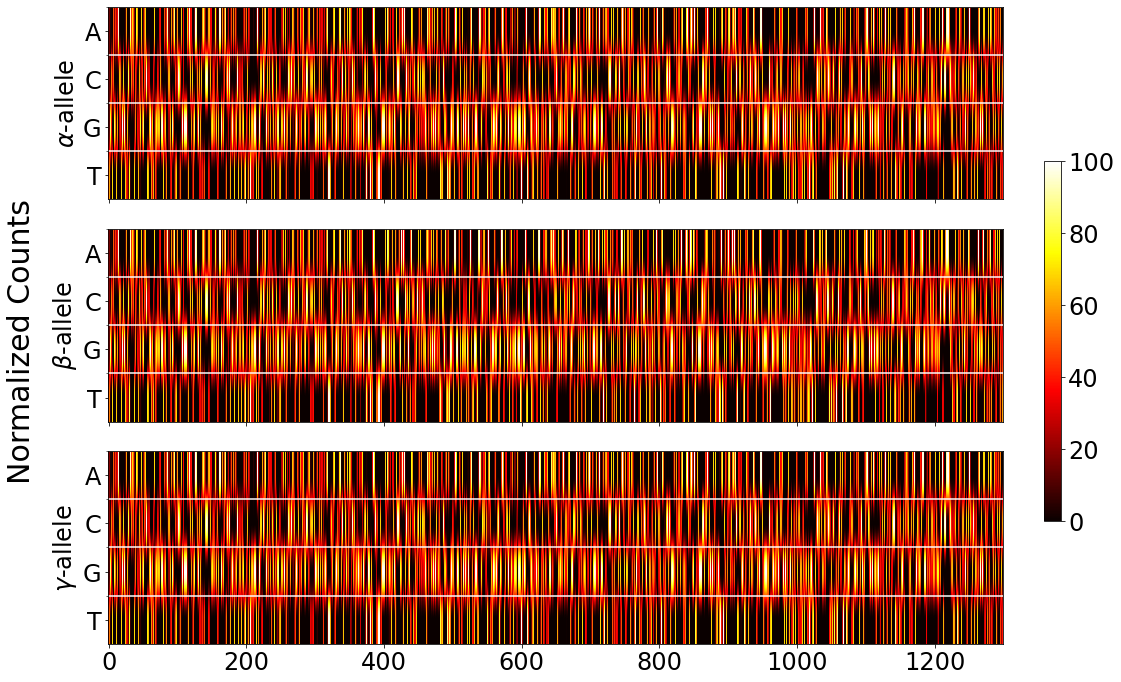

In [162]:
fig, ax = plt.subplots(3,1, figsize = (16,10), sharex = True)
im1 = ax[0].imshow(df[[('Alpha','A'),('Alpha','C'),('Alpha','G'),('Alpha','T')]].T, cmap = 'hot', vmin = 0, vmax = 100)
ax[0].set_aspect(70)
ax[0].set_ylabel(r'$\alpha$-allele')
ax[0].set_yticks([0,1,2,3])
ax[0].set_yticklabels(['A','C','G','T'])
ax[0].grid(which='minor', color='white', linestyle='-', linewidth=1.5)
ax[0].set_yticks(np.arange(-.5, 3.5, 1), minor=True)

im2 = ax[1].imshow(df[[('Beta','A'),('Beta','C'),('Beta','G'),('Beta','T')]].T, cmap = 'hot', vmin = 0, vmax = 100)
ax[1].set_aspect(70)
ax[1].set_ylabel(r'$\beta$-allele')
ax[1].set_yticks([0,1,2,3])
ax[1].set_yticklabels(['A','C','G','T'])
ax[1].grid(which='minor', color='white', linestyle='-', linewidth=1.5)
ax[1].set_yticks(np.arange(-.5, 3.5, 1), minor=True)

im3 = ax[2].imshow(df[[('Gamma','A'),('Gamma','C'),('Gamma','G'),('Gamma','T')]].T, cmap = 'hot', vmin = 0, vmax = 100)
ax[2].set_aspect(70)
ax[2].set_ylabel(r'$\gamma$-allele')
ax[2].set_yticks([0,1,2,3])
ax[2].set_yticklabels(['A','C','G','T'])
ax[2].grid(which='minor', color='white', linestyle='-', linewidth=1.5)
ax[2].set_yticks(np.arange(-.5, 3.5, 1), minor=True)

fig.text(0.0, 0.5, 'Normalized Counts', va='center', rotation='vertical', size = 30)

fig.tight_layout()

fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.9, 0.25, 0.015, 0.5])
cbar = fig.colorbar(im1, cbar_ax)
